## Final Term Project Milestone 5
**April Meyer  
DSC540-T301 Data Preparation (2207-1)**

**Merging the Data and Storing in a Database/Visualizing Data**

 - Now that you have cleaned and transformed your 3 datasets, you need to merge them together and load the data into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options).  
 - Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source.  
 - For the visualization portion of the project, you are welcome to use a python library like Matplotlib, Seaborn, or an R package ggPlot2, Plotly, or Tableau/PowerBI. 
 - Submit your code for merging and storing in the database, with your code for the visualizations along with a 250-500-word summary of what you learned and had to do to complete the project.  


In [34]:
# Import the necessary libraries
import urllib.request, urllib.parse, urllib.error
import requests
from bs4 import BeautifulSoup
import pandas as pd 
from string import digits 
from datetime import datetime
import sqlite3
import json
import matplotlib.pyplot as plt
import numpy as np

In [35]:
# Code from Milestone 2
# reads CSV file and stores as a dataframe
amazon_reviews = pd.read_csv('amazon_reviews.csv')
print(amazon_reviews.head())

# Code from Milestone 3
# Best Sellers - The New York Times
# reads CSV file and stores as a dataframe
NewYorkTimes_BestSellers = pd.read_csv('NewYorkTimes_BestSellers.csv')
NewYorkTimes_BestSellers['Weeks'] = NewYorkTimes_BestSellers['Weeks'].str.replace('New this week', '0')
NewYorkTimes_BestSellers['Weeks'] = NewYorkTimes_BestSellers['Weeks'].str.split(' weeks').str[0]
print(NewYorkTimes_BestSellers.head())

        ASIN_ISBN  Rating  TotalReviewsbyISBN  CountOfRatings
0  A1REUF3A1YCPHM     5.0                  50              35
1   A1YRBRK2XM5D5     5.0                   2               2
2  A1V8ZR5P78P4ZU     5.0                   1               1
3  A2ZB06582NXCIV     5.0                   1               1
4   ACPQVNRD3Z09X     5.0                   2               2
  Weeks                Book Name            Author           isbn
0     5       THE VANISHING HALF      Brit Bennett  9780525536291
1     3               28 SUMMERS  Elin Hilderbrand  9780316420044
2    95  WHERE THE CRAWDADS SING       Delia Owens  9780735219090
3     0           SEX AND VANITY        Kevin Kwan  9780385546287
4    22            THE GUARDIANS      John Grisham  9780525620945


In [36]:
# Code from Milestone 4

# Opening my the APIkeys.json file to retrieve my Goodreads Key
with open('APIkeys.json') as f:
    keys = json.loads(f.read())
    GoodReads = keys[0]['GoodReads']
# Assigning the Goodreads url as a string to a variable. 
serviceurl = 'https://www.goodreads.com/search/index.xml?'
apikey = '&key='+ GoodReads

def to_dataframe(list):
    # 1. Format data into a more readable format from list to dataframe
    additional_booksby_author = pd.DataFrame.from_records(to_dataframe,columns=['Book Name','Author','Average_Rating'])
    #2. Clean Authors Name - remove newline
    additional_booksby_author['Author'].replace('\n', '', regex=True, inplace=True)
    #3. Clean Authors Name - remove numbers
    additional_booksby_author['Author'] = additional_booksby_author['Author'].str.replace('\d+', '')
    return additional_booksby_author

In [37]:
# Code from Milestone 4

alls = []
#additional_booksby_author = []
def search_author(author):
    search = '&q=' + author
    url = serviceurl + apikey + search
    uh = urllib.request.urlopen(url)
    data = uh.read()
    soup = BeautifulSoup(data,'xml')
    for d in soup.findAll('work'):
        titles = d.find('title')
        authors = d.find('author')
        average_rating = d.find('average_rating')
        all1=[]
        if titles is not None:
            all1.append(titles.get_text())
        else:
            all1.append("unknown-product")

        if author is not None:
            all1.append(authors.get_text())
        else:
            all1.append("unknown-author")

        if average_rating is not None:
            all1.append(average_rating.get_text())
        else:
            all1.append("unknown-rating")

        alls.append(all1)
    # 1. Format data into a more readable format from list to dataframe
    additional_booksby_author = pd.DataFrame.from_records(alls,columns=['Book_Name','Author','Average_Rating'])
    #2. Clean Authors Name - remove newline
    additional_booksby_author['Author'].replace('\n', '', regex=True, inplace=True)
    #3. Clean Authors Name - remove numbers
    additional_booksby_author['Author'] = additional_booksby_author['Author'].str.replace('\d+', '')
    #4. Replacing the + from the search with a space
    author = author.replace('+', ' ')
    #5. Removing books that are not by searched author
    # Get names of indexes for which column is not the search author
    indexNames = additional_booksby_author[ additional_booksby_author['Author'] != author].index
    # Delete these row indexes from dataFrame
    additional_booksby_author.drop(indexNames , inplace=True)    
    #print(author_books)
    # additional_booksby_author = additional_booksby_author.values.tolist()
    return additional_booksby_author  
# author_df = search_author("Delia+Owens")
# author_df

In [38]:
# Iterate over two given columns only from the dataframe

all_authors = NewYorkTimes_BestSellers[['Author']]
all_authors['Author'] = all_authors['Author'].str.split(' Illustrated').str[0]
all_authors['Author'] = all_authors['Author'].str.split(' illustrated').str[0]
all_authors['Author'] = all_authors['Author'].str.split(' and').str[0]
all_authors['Author'].replace(' ', '+', regex=True, inplace=True)
#Removing duplicates
all_authors.drop_duplicates(inplace=True) 
# authors_list = all_authors.values.tolist()
authors_list = all_authors['Author'].tolist() 
# blank dataframe for all books
additional_booksby_bestsellers = pd.DataFrame()
# Using for loop 
for i in authors_list: 
    # print(i)  
    author_df = search_author(i)
    # print(author_df)
    additional_booksby_bestsellers = additional_booksby_bestsellers.append(author_df, sort=False)
    # additional_booksby_bestsellers.append(author_df)

additional_booksby_bestsellers

C:\Users\swim_\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\swim_\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\swim_\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,Book_Name,Author,Average_Rating
0,The Vanishing Half,Brit Bennett,4.41
1,The Mothers,Brit Bennett,3.86
4,Butterball (A Short Story),Brit Bennett,3.67
5,Je ne sais pas quoi faire des gentils blancs,Brit Bennett,4.14
7,Nadia: Excerpted from The Mothers (Electric Li...,Brit Bennett,0.0
...,...,...,...
816,40 Days Of Biblical Declarations: Advancing Fr...,Kimberly Jones,4.80
817,And You Shall Decree A Thing: Topical Declarat...,Kimberly Jones,4.75
818,The Untold Story of Cleopatra Revealed,Kimberly Jones,2.94
825,In the Forest of Fontainebleau: Painters and P...,Kimberly Jones,4.12


In [39]:
# Code for Milestone 5 
# Creates sqlite database
def create_connection(db_file):
    """ create a database connection to a SQLite database """
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()

if __name__ == '__main__':
    create_connection(r"pythonsqlite.db")

2.6.0


In [40]:
# connect to database
conn = sqlite3.connect("pythonsqlite.db")

# push the dataframe from Milestone 2 to sql = amazon_reviews
amazon_reviews.to_sql("amazon_reviews", conn, if_exists="replace")
# push the dataframe from Milestone 3 to sql = NewYorkTimes_BestSellers
NewYorkTimes_BestSellers.to_sql("NewYorkTimes_BestSellers", conn, if_exists="replace")
# push the dataframe from Milestone 4 to sql = additional_booksby_bestsellers
additional_booksby_bestsellers.to_sql("additional_booksby_bestsellers", conn, if_exists="replace")

C:\Users\swim_\AppData\Roaming\Python\Python37\site-packages\pandas\core\generic.py:2663: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  method=method,


In [41]:
amazon_reviews = conn.execute("SELECT * FROM amazon_reviews LIMIT 10")
for row in amazon_reviews:
    print(row)

(0, 'A1REUF3A1YCPHM', 5.0, 50, 35)
(1, 'A1YRBRK2XM5D5', 5.0, 2, 2)
(2, 'A1V8ZR5P78P4ZU', 5.0, 1, 1)
(3, 'A2ZB06582NXCIV', 5.0, 1, 1)
(4, 'ACPQVNRD3Z09X', 5.0, 2, 2)
(5, 'AVP0HXC9FG790', 5.0, 45, 44)
(6, 'A32MQTLQQN44WW', 5.0, 2, 2)
(7, 'A13CHIJPFCEP2M', 5.0, 2, 2)
(8, 'A324TTUBKTN73A', 5.0, 10, 9)
(9, 'ADLBKEDYXKXCH', 5.0, 4, 2)


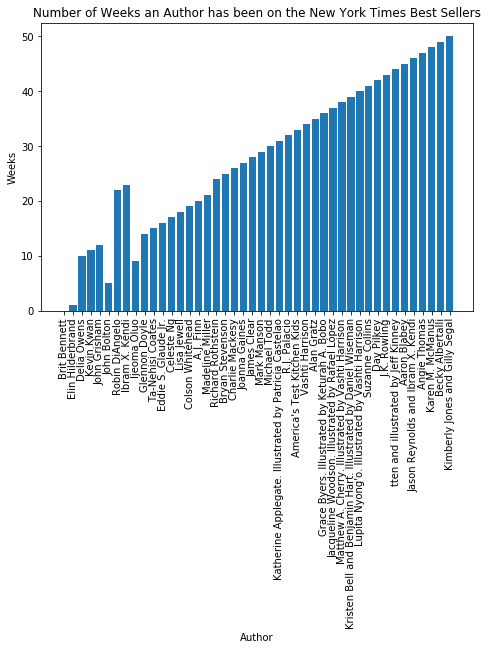

In [42]:
test_NewYorkTimes_BestSellers = conn.execute("SELECT * FROM NewYorkTimes_BestSellers")
# for row in test_NewYorkTimes_BestSellers:
#    print(row)
    
weeks_on = []
author = []
for row in test_NewYorkTimes_BestSellers:
    weeks_on.append(row[0])
    author.append(row[3])
    
# 1 Data Visualization 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(author,weeks_on)
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Weeks")
plt.title("Number of Weeks an Author has been on the New York Times Best Sellers")
plt.show()

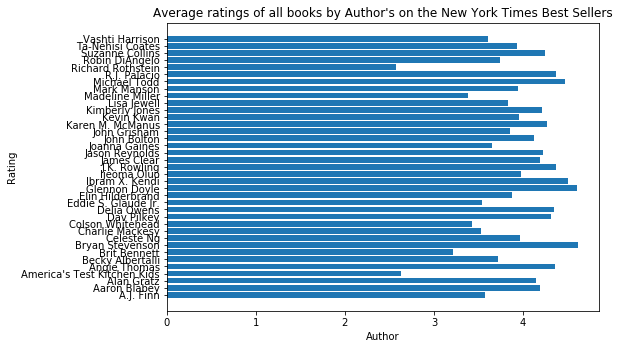

In [43]:
test_additional_booksby_bestsellers = conn.execute("SELECT Author, avg(Average_Rating) FROM additional_booksby_bestsellers Group By Author")

# for row in test_additional_booksby_bestsellers:
#    print(row)
    
rating = []
author = []
for row in test_additional_booksby_bestsellers:
    rating.append(row[1])
    author.append(row[0])
    
# 2 Data Visualization 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.barh(author,rating)
plt.xlabel("Author")
plt.ylabel("Rating")
plt.title("Average ratings of all books by Author's on the New York Times Best Sellers")
plt.show()

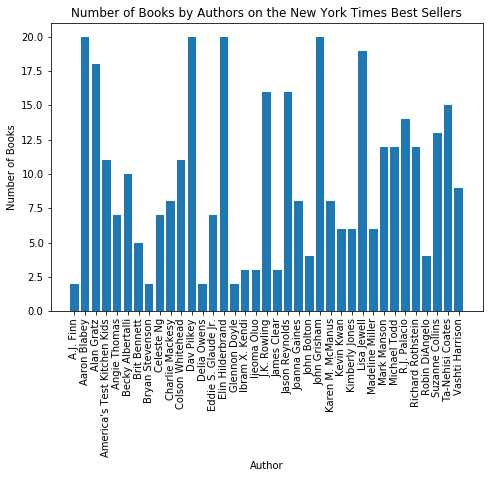

In [44]:
test_additional_booksby_bestsellers = conn.execute("SELECT Author, count(Book_Name) FROM additional_booksby_bestsellers Group By Author")

# names = list(map(lambda x: x[0], test_additional_booksby_bestsellers.description))

"""
for row in test_additional_booksby_bestsellers:
   print(row)
"""   
num_books = []
author = []
for row in test_additional_booksby_bestsellers:
    num_books.append(row[1])
    author.append(row[0])
    
# 3 Data Visualization 
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(author,num_books)
plt.xticks(rotation=90)
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.title("Number of Books by Authors on the New York Times Best Sellers")
plt.show()


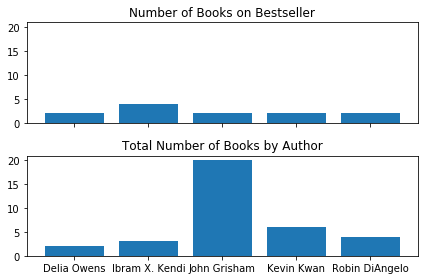

In [45]:
# 4 - Two bar charts that use data joining authors with more than 1 best seller with their other books (count)

authors_more_than_one = conn.execute("SELECT B.Author, B.ct_books_bestseller, A.Author, count(A.Author) as ct_other_books  FROM additional_booksby_bestsellers A INNER JOIN (SELECT Author, count(Author) as ct_books_bestseller  FROM NewYorkTimes_BestSellers  Group By Author HAVING COUNT(Author) > 1) as B on A.Author = B.Author Group By A.Author")

author = []
ct_bestsellers = []
ct_books = []
for row in authors_more_than_one:
    author.append(row[0])
    ct_bestsellers.append(row[1])
    ct_books.append(row[3])

# Receive ax1 and ax2
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# Use ax1 to plot bestsellers count - from New York Best seller data
ax1.bar(author,ct_bestsellers)
ax1.set_title("Number of Books on Bestseller")

# Use ax2 to plot all book count - from Goodreads data
ax2.bar(author,ct_books)
ax2.set_title("Total Number of Books by Author")

# prevent weird overlaps
plt.tight_layout()

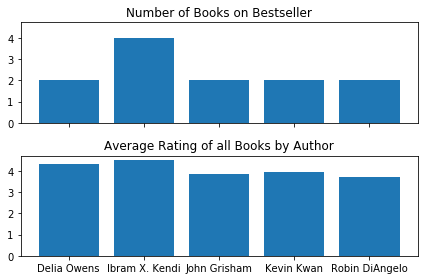

In [46]:
# 5 - Two bar charts that use data joining authors with more than 1 best seller with their other books (average rating)

authors_more_than_one = conn.execute("SELECT B.Author, B.ct_books_bestseller, A.Author, avg(A.Average_Rating) as ct_other_books  FROM additional_booksby_bestsellers A INNER JOIN (SELECT Author, count(Author) as ct_books_bestseller  FROM NewYorkTimes_BestSellers  Group By Author HAVING COUNT(Author) > 1) as B on A.Author = B.Author Group By A.Author")

author = []
ct_bestsellers = []
avgrating_books = []
for row in authors_more_than_one:
    author.append(row[0])
    ct_bestsellers.append(row[1])
    avgrating_books.append(row[3])

# Receive ax1 and ax2
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True)

# Use ax1 to plot bestsellers count - from New York Best seller data
ax1.bar(author,ct_bestsellers)
ax1.set_title("Number of Books on Bestseller")

# Use ax2 to plot all book count - from Goodreads data
ax2.bar(author,avgrating_books)
ax2.set_title("Average Rating of all Books by Author")

# prevent weird overlaps
plt.tight_layout()

**Summary of what you learned and had to do to complete the project.**  

Through out this term I have learned a lot with each milestone of the term project. During Milestone one I selected three data sources: amazon reviews for book categories, bestsellers from amazon website, and Goodreads for an API call. After feedback and further research, I did switch my website data source to New York Best Sellers. I did find this milestone hard to figure out three data sources that related. Milestone two was cleaning and transforming the amazon book reviews csv file. This data set only had the user id, isbn, date/time, and rating. This step was not as hard as the others since I have pulled data into a dataframe from files before. I did have to do some research to learn how to convert/manipulate data and time values. Aggregation and group by were another topic discovered about during Milestone two. This was interesting and felt very similar to how it is done in SQL.  

Milestone three was working with the New York Times Bestseller website. I learned a lot with this milestone. I had not worked with beautiful soup before. While working with a for loop I had to freshen up on lists and nest lists. Throughout this whole step I kept trying to use a list like a dataframe. I continued to use beautiful soup for Milestone four. In this phase I used an API to search all books by an Author on Goodreads. I liked this step the most, because I felt like I learned a lot about manipulating the author’s name to work in the API call.  

Finally, in the last milestone 5 I used the search_author function created in milestone four to search for additional books by the authors on the New York Best Seller list. This was my favorite part of milestone five was figuring out how to loop through all the authors and call the search function from milestone four. I liked using sql to pull the data from the database. It was easier for me than aggregating with the dataframes from previous milestone. My major disappoint was picking the csv file that I did. Initial I thought I would be able to join those reviews with my other data sets, but the ISBN was an ASIN. ASIN stands for Amazon Standard Identification Number. It is a 10-charcter alphanumeric unique identifier that is assigned by Amazon.com. I was unable to join it with the other two datasets. Lastly, I ended up only doing bar charts for my data visualization, since it was all categorical data. 
